In [1]:
# check if packages can be loaded, i.e. they are already installed
library(rgl) # 3D visualization
library(cluster) # additonal cluster analysis techniques
library(ISLR2) # material from book "Introduction to Statistical Learn."


2.1 K-means clustering with 3 dimensions

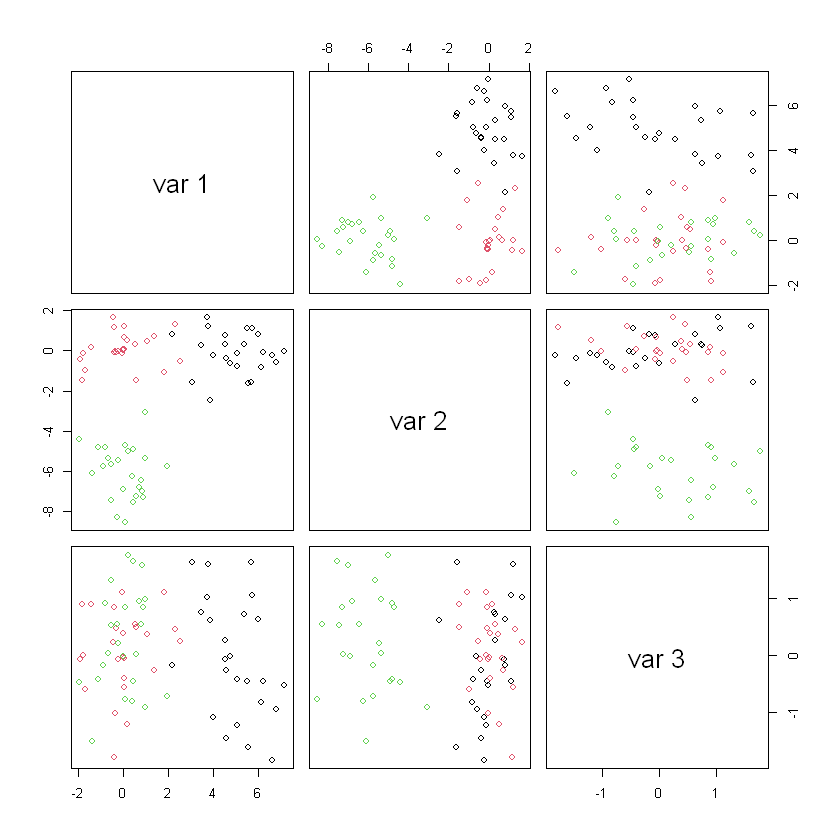

In [2]:
set.seed(135792468)
x <- matrix(rnorm(75*3), ncol = 3)
x[1:25, 1] <- x[1:25, 1] + 5
x[51:75, 2] <- x[51:75, 2] - 6
truth <- rep(1:3, each = 25)
pairs(x, col = truth)
plot3d(x, col = truth, size=1, type="s")

In [4]:
km_out <- kmeans(x, centers = 3, nstart = 20)

In [5]:
table(km_out$cluster, truth, dnn = c("cluster results", "true grouping"))

               true grouping
cluster results  1  2  3
              1  0  0 25
              2  1 24  0
              3 24  1  0

In [6]:
plot3d(x, col = km_out$cluster, size = 1, type = "s")
plot3d(km_out$centers, add=TRUE, col = 1:3, type = "s")

In [7]:
set.seed(135792468)
y <- matrix(rnorm(75 * 10), ncol = 10)
y[1:25, 1] <- y[1:25, 1] + 5
y[51:75, 2] <- y[51:75, 2] - 6
truth <- rep(1:3, each = 25)
table(km_out$cluster, truth, dnn = c("cluster results", "true grouping"))

               true grouping
cluster results  1  2  3
              1  0  0 25
              2  1 24  0
              3 24  1  0

2.2 USA arrests data: PCA and clustering


In [8]:
data("USArrests")
pca_out <- prcomp(USArrests, scale = TRUE)


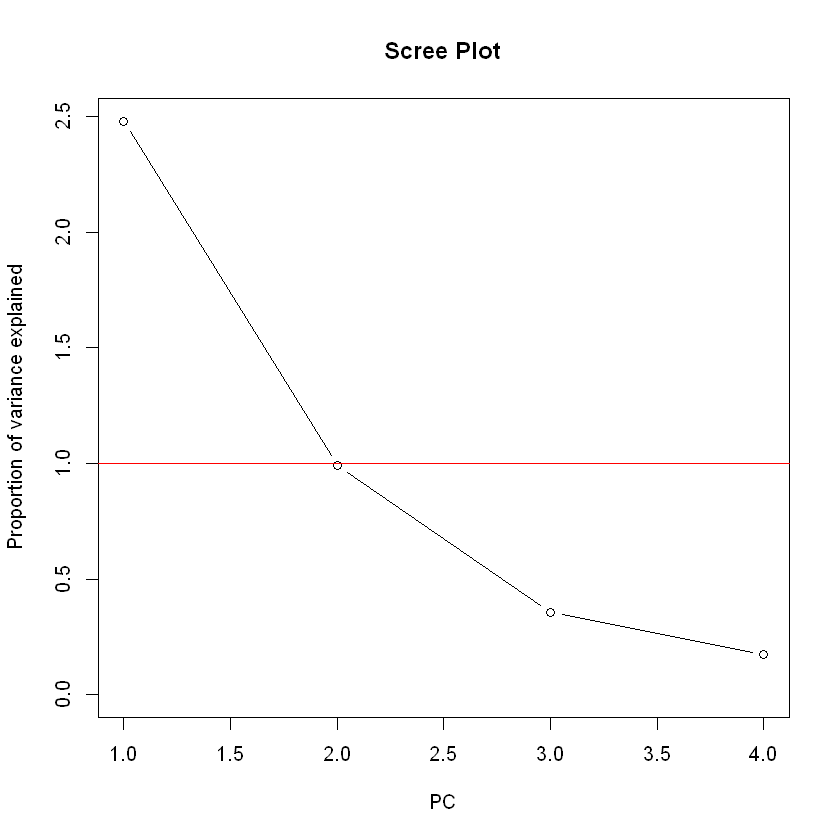

In [10]:
explVar <- pca_out$sdev^2
plot(explVar, main = "Scree Plot",
xlab = "PC", ylab = "Proportion of variance explained",
ylim = c(0, max(explVar)), type = "b")
abline(h = 1, col = "red")

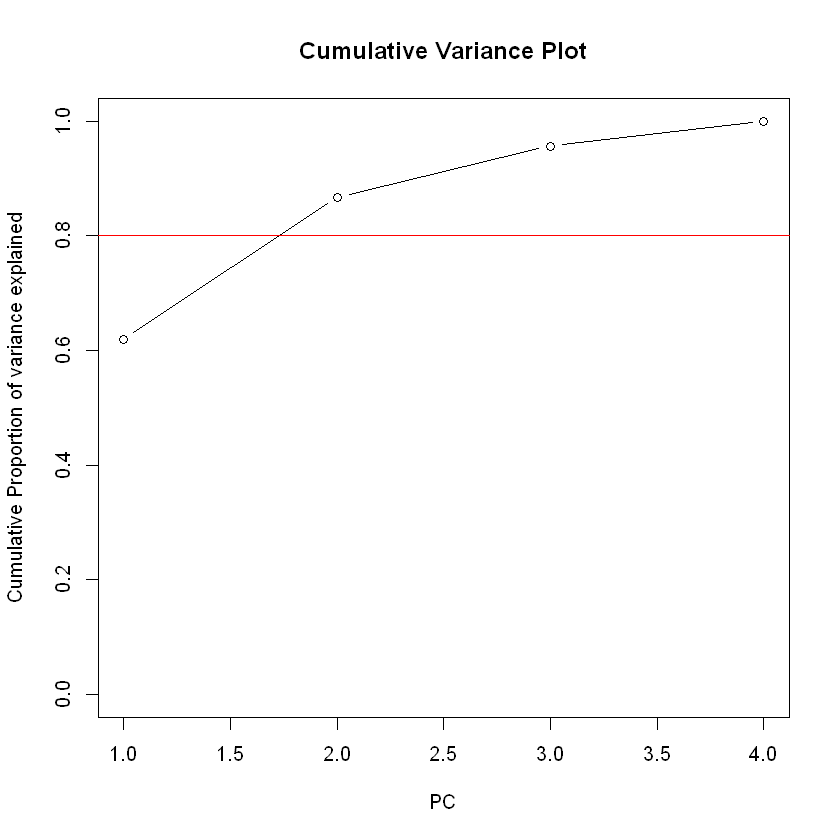

In [11]:
plot(cumsum(explVar)/sum(explVar), main = "Cumulative Variance Plot",
xlab = "PC", ylab = "Cumulative Proportion of variance explained",
ylim = c(0,1), type = "b")
abline(h = 0.8, col = "red")

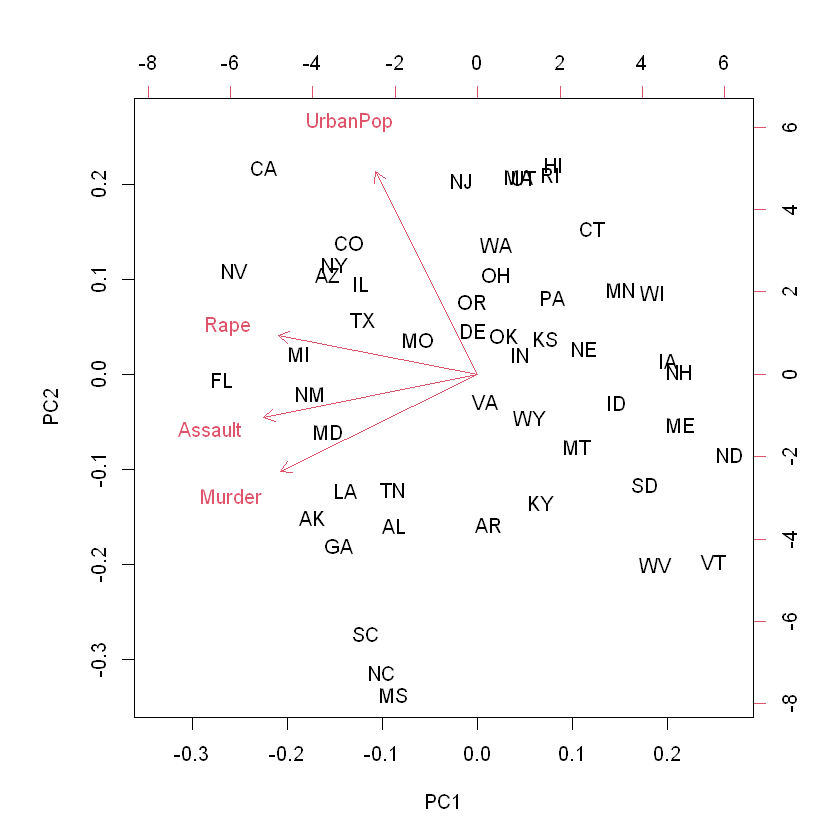

In [12]:
biplot(pca_out, xlabs = state.abb)

2.2.3 K-Means with PCs

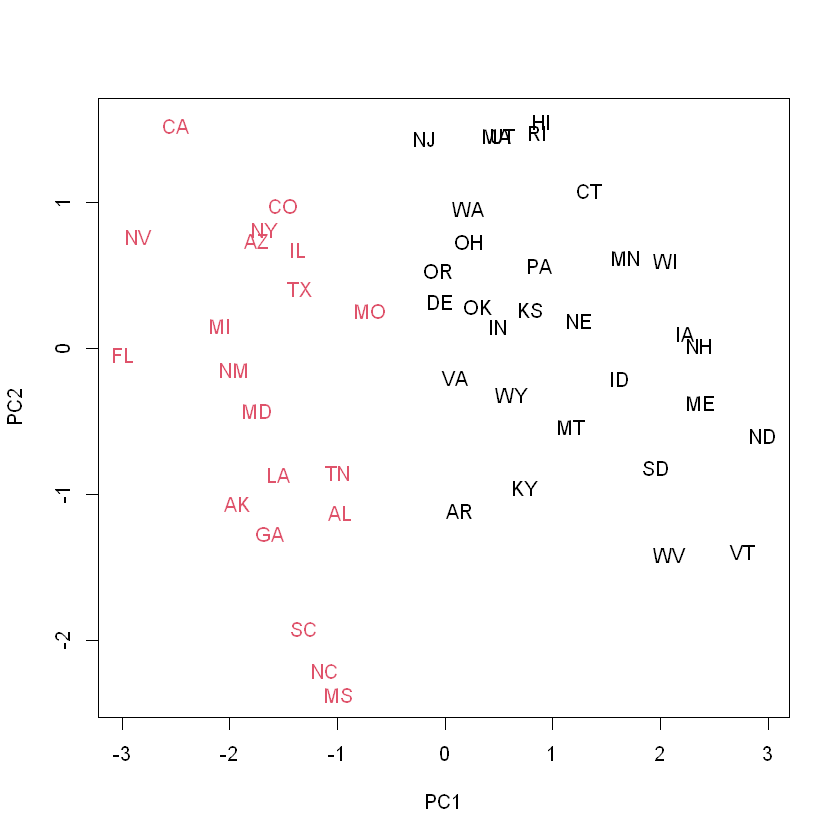

In [13]:
km_out <- kmeans(pca_out$x, centers = 2, nstart = 20)
plot(pca_out$x[, 1:2], type="n")
text(pca_out$x[,1], pca_out$x[,2], labels=state.abb, col=km_out$cluster)


In [14]:
table(km_out$cluster)


 1  2 
30 20 

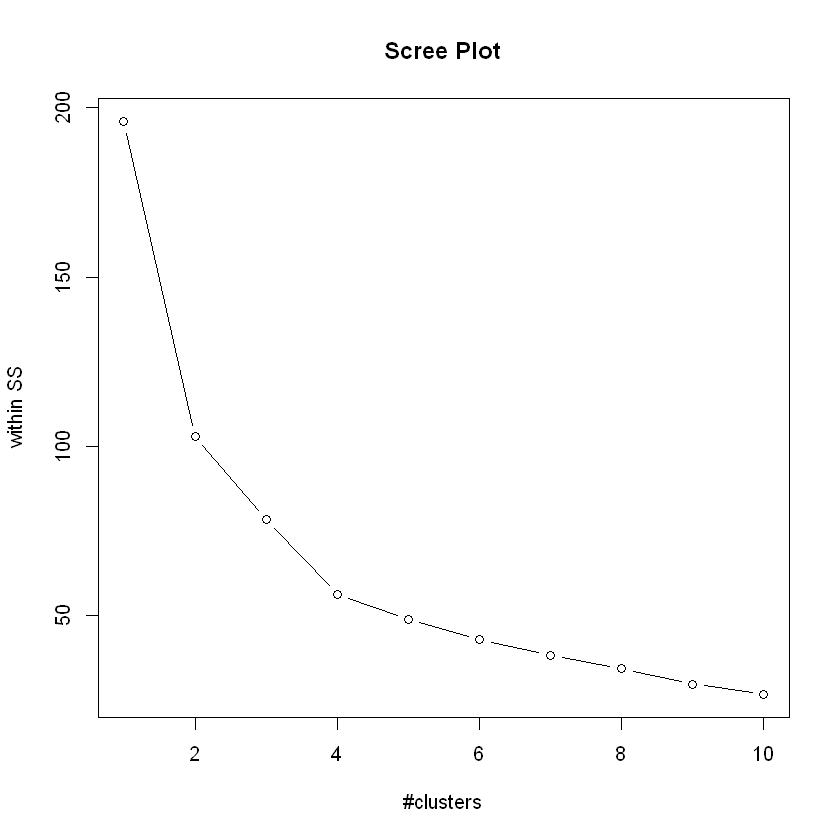

In [15]:
# correct code
wss_vec <- rep(NA, 10)
for(k in 1:10){
km_out <- kmeans(pca_out$x, centers = k, nstart=20)
wss_vec[k] <- km_out$tot.withinss
}
plot(wss_vec, main = "Scree Plot",
xlab = "#clusters", ylab = "within SS", type = "b")

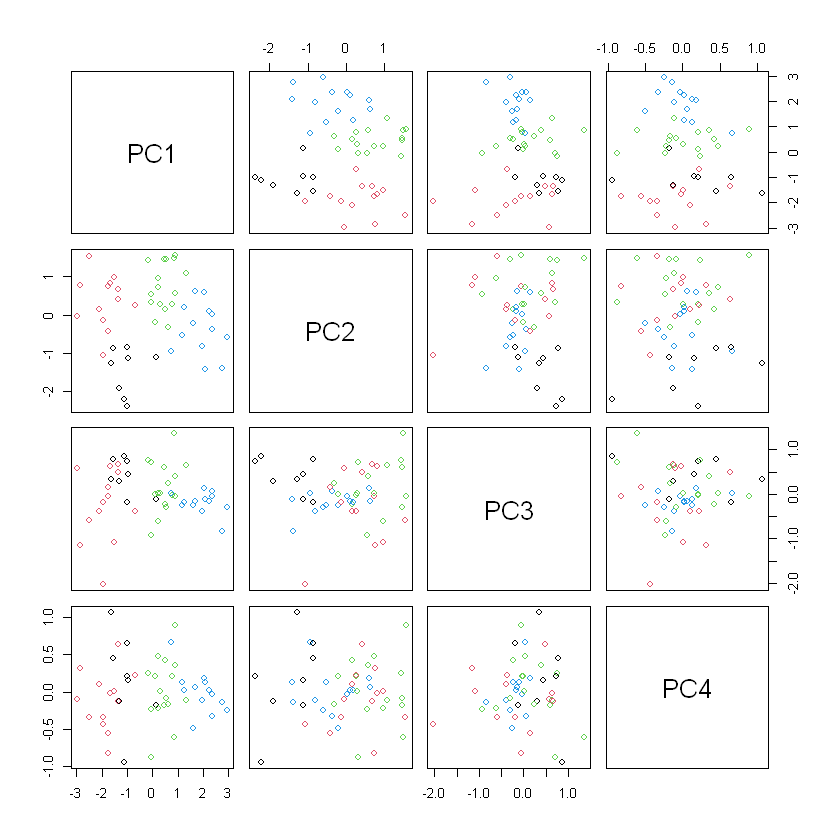

In [16]:
km_out <- kmeans(pca_out$x, centers = 4, nstart=20)
pairs(pca_out$x, col = km_out$cluster)

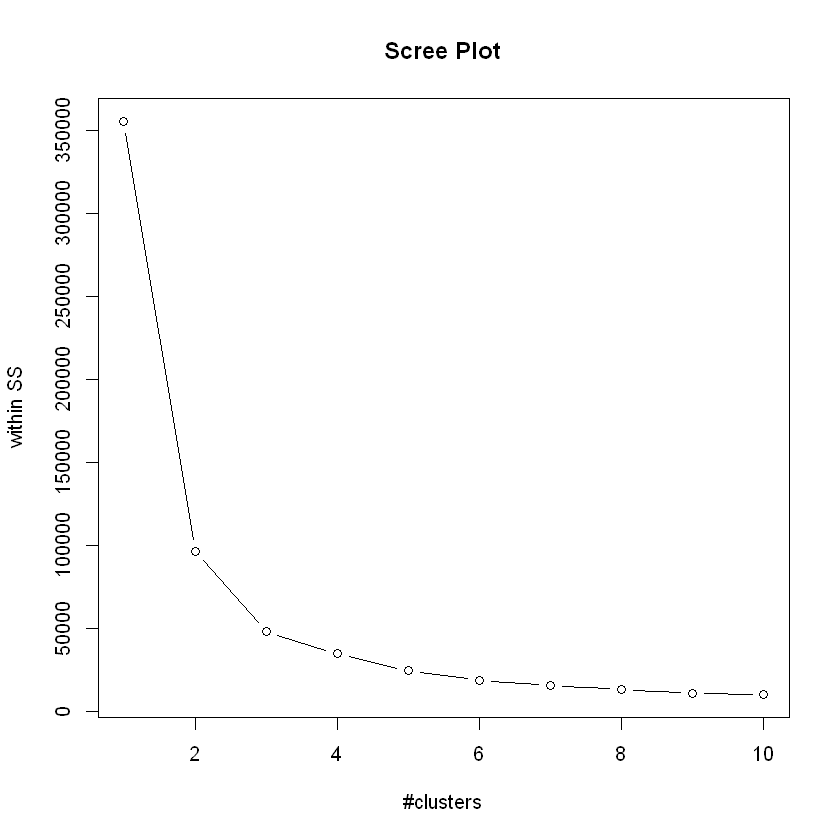

,1,2,3,4,Sum
1,3,0,5,0,8
2,8,6,1,1,16
3,0,4,0,9,13
4,3,0,10,0,13
Sum,14,10,16,10,50


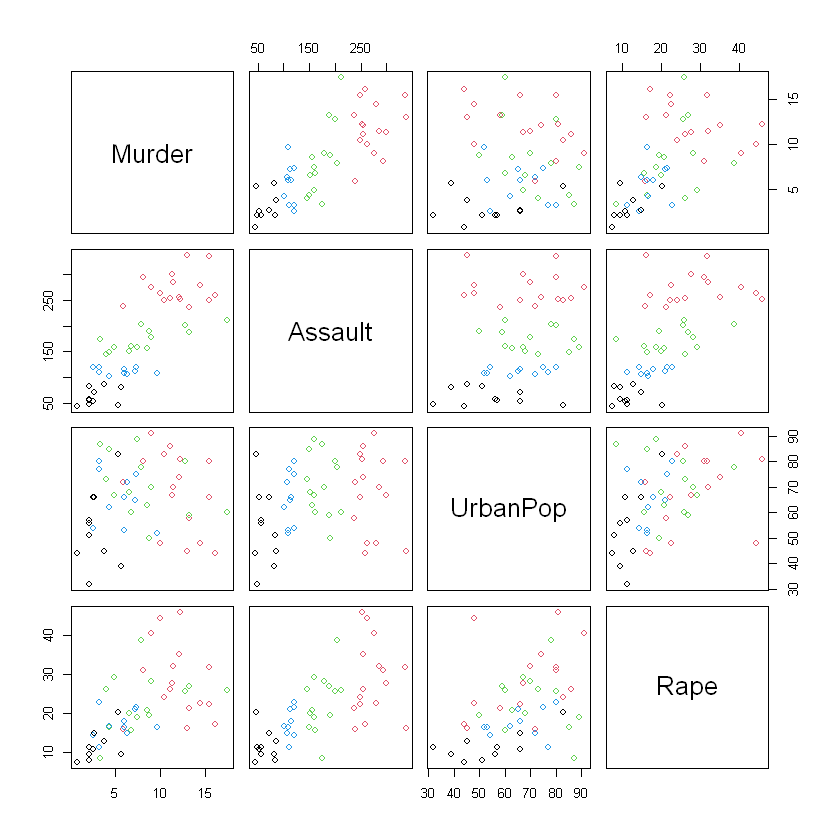

In [17]:
wss_vec <- rep(NA, 10)
for(k in 1:10){
km_out <- kmeans(USArrests, centers = k, nstart=20)
wss_vec[k] <- km_out$tot.withinss
}
plot(wss_vec, main = "Scree Plot",
    xlab = "#clusters", ylab = "within SS", type = "b")
    km_out <- kmeans(USArrests, centers = 4, nstart=20)
    pairs(USArrests, col = km_out$cluster)
table(kmeans(pca_out$x, centers = 4, nstart=20)$cluster,
    kmeans(USArrests, centers = 4, nstart=20)$cluster,
    dnn = c("PCA based", "Orig. data")) %>%
addmargins()

2.3 Hamburg decathlon data, PCA and clustering


In [19]:
# load data
decathlon <- read.csv("Data/DecathlonHamburg2017.csv")


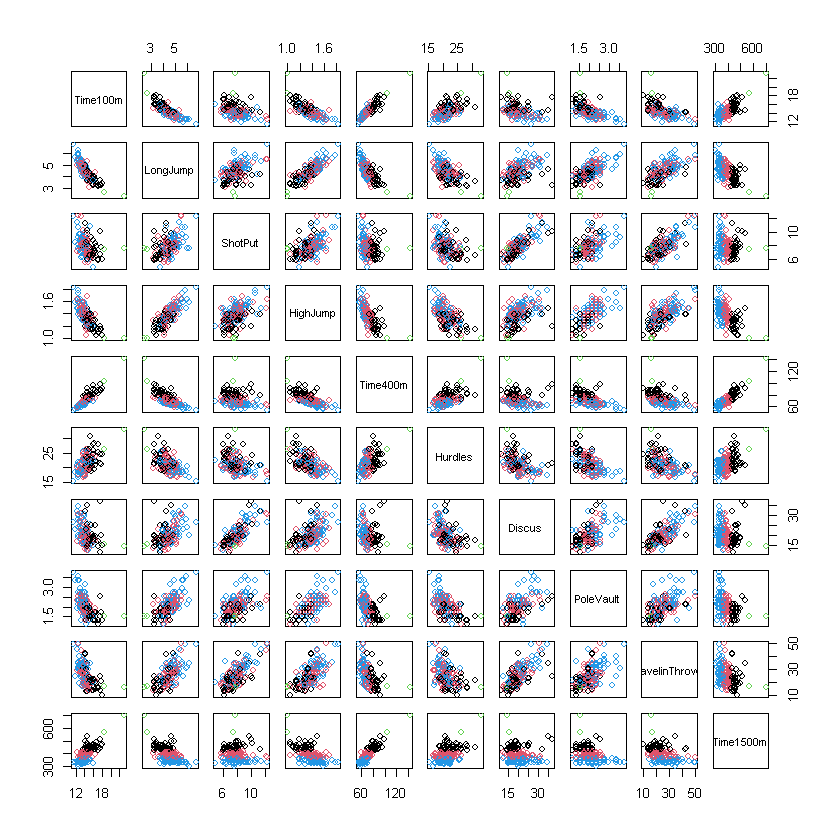

In [21]:
km_out <- kmeans(decathlon, centers = 4)
pairs(decathlon, col = km_out$cluster)

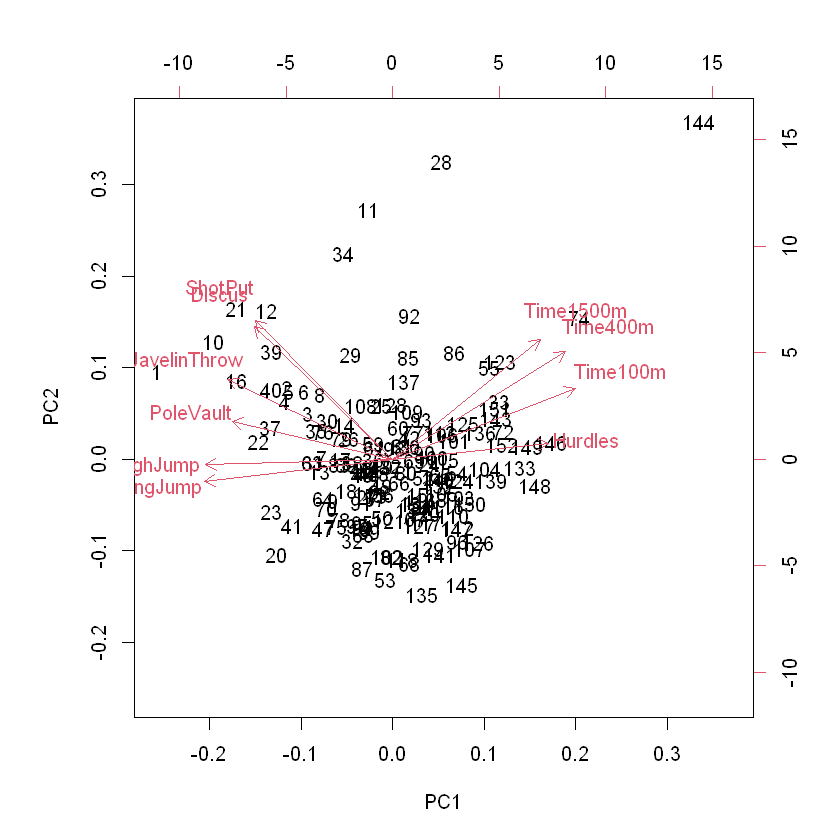

In [22]:
pca_out <- prcomp(decathlon, scale = TRUE)
biplot(pca_out)

In [23]:
plot3d(pca_out$x[,1:3], size = 1, type = "s")

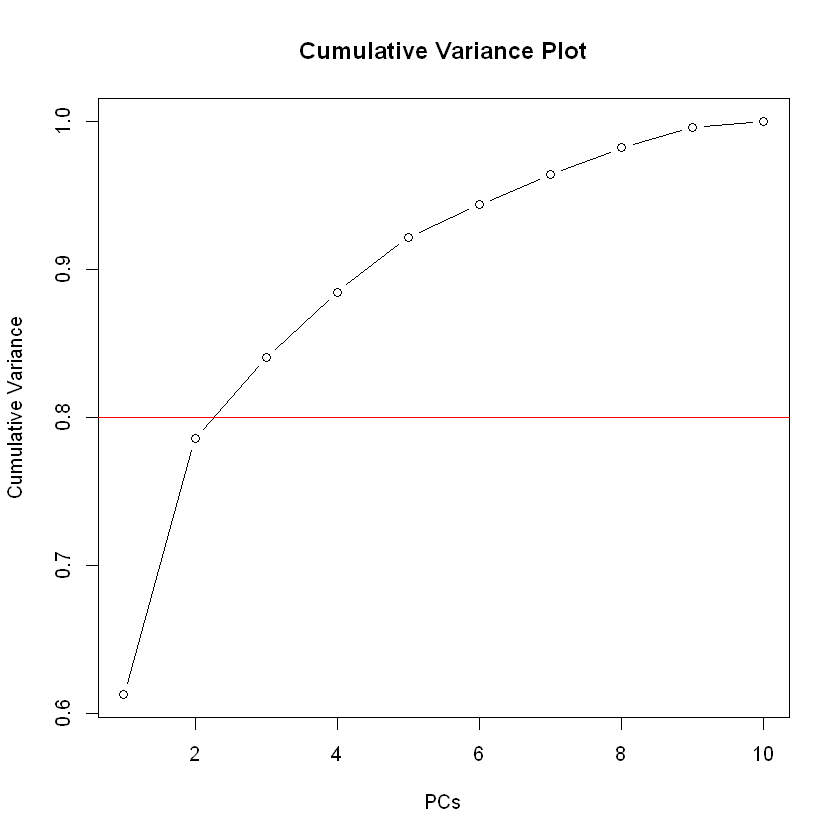

In [25]:
plot(cumsum(pca_out$sdev^2)/length(pca_out$sdev),
    xlab = "PCs", ylab = "Cumulative Variance",
    main = "Cumulative Variance Plot",
    type = "b")
abline(h = 0.8, col = "red")

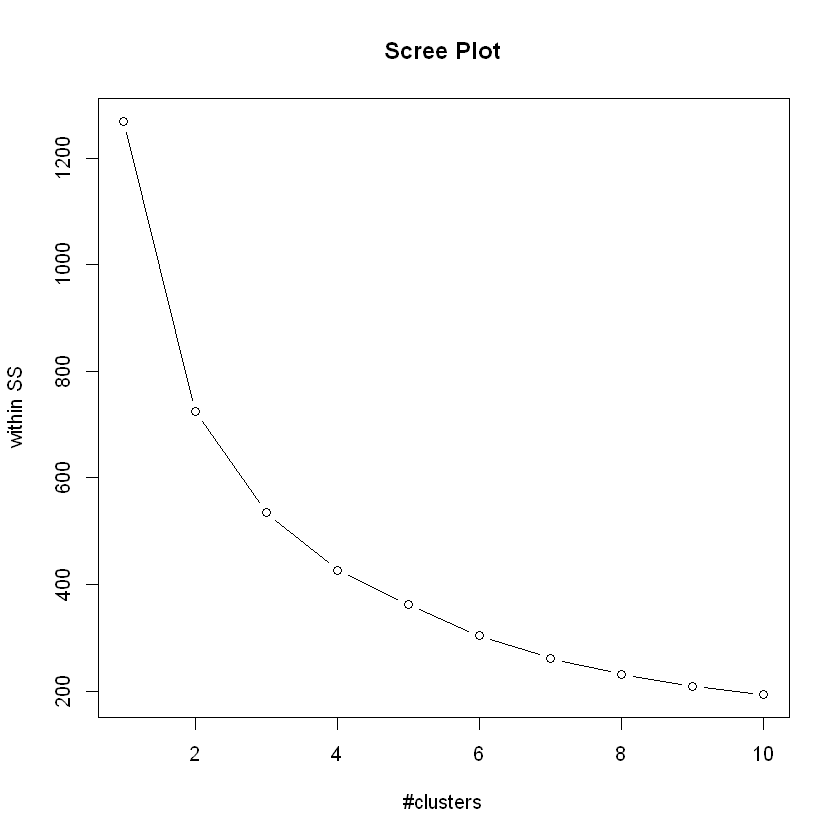

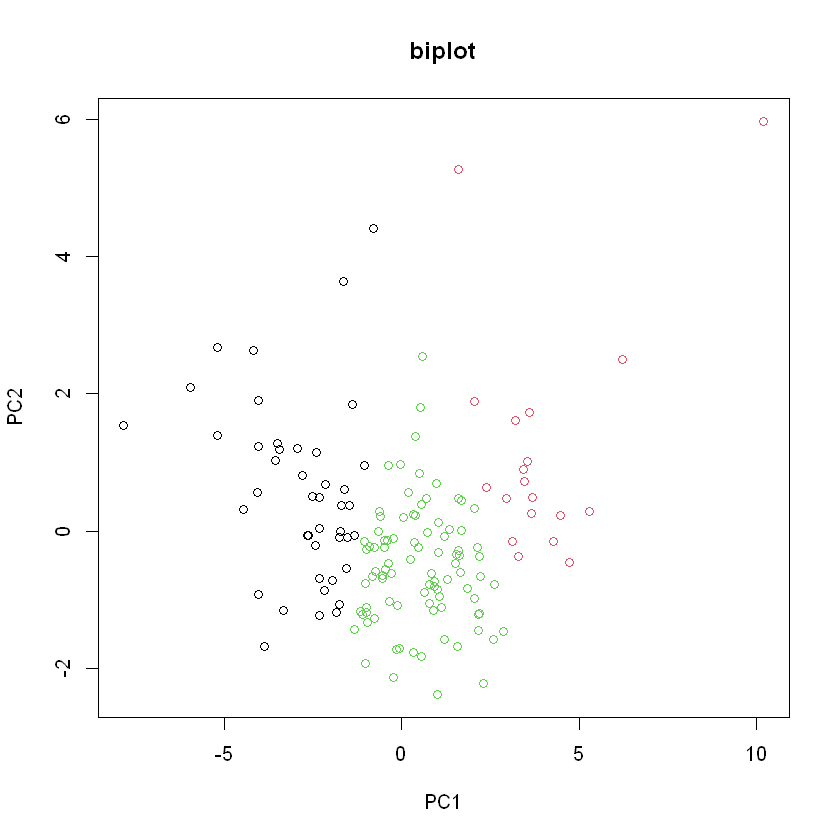

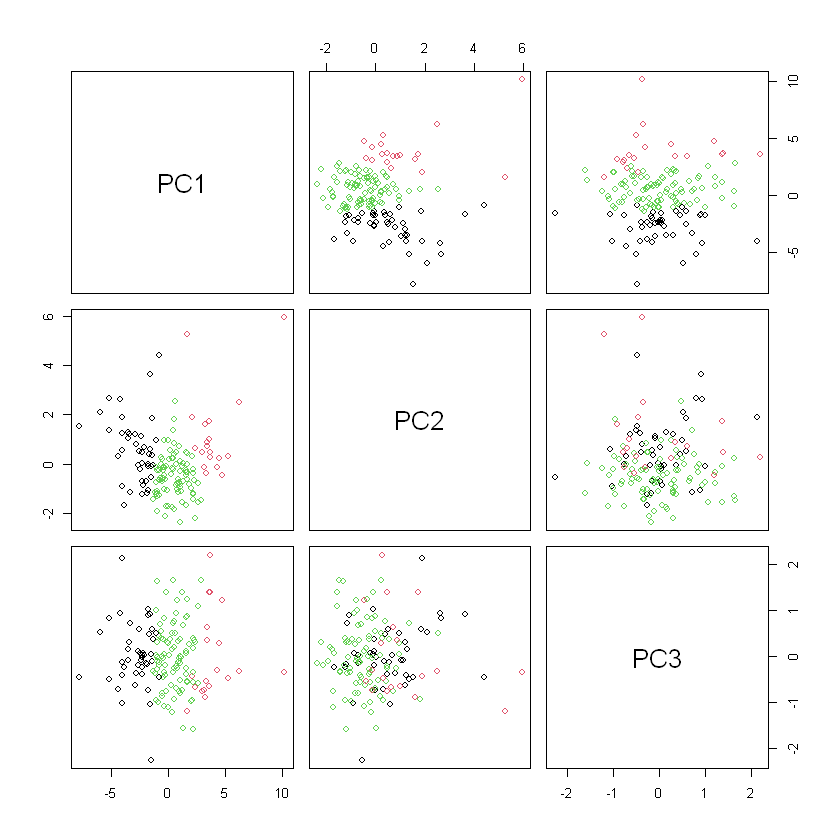

In [26]:
wss_vec <- rep(NA, 10)
for(k in 1:10){
    km_out <- kmeans(pca_out$x[, 1:3], centers = k, nstart=20)
    wss_vec[k] <- km_out$tot.withinss
}
plot(wss_vec, main = "Scree Plot",
    xlab = "#clusters", ylab = "within SS", type = "b")
# k=3 looks reasonable
km_final <- kmeans(pca_out$x[, 1:3], centers = 3, nstart=20)
# biplot coloured with cluster solution
plot(pca_out$x[, 1:2], col = km_final$cluster, main = "biplot")
# biplot coloured with cluster solution
pairs(pca_out$x[, 1:3], col = km_final$cluster)


3 K-Medoids using the PAM Algorithm

3.1 PAM Clustering

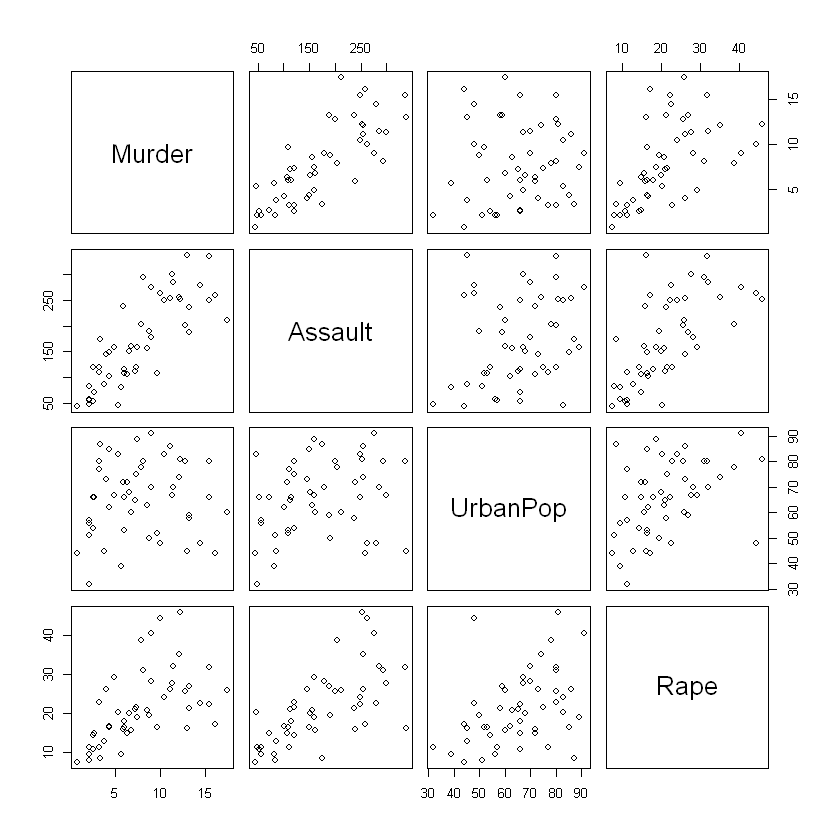

In [27]:
data("USArrests")
row.names(USArrests) <- state.abb
pairs(USArrests)


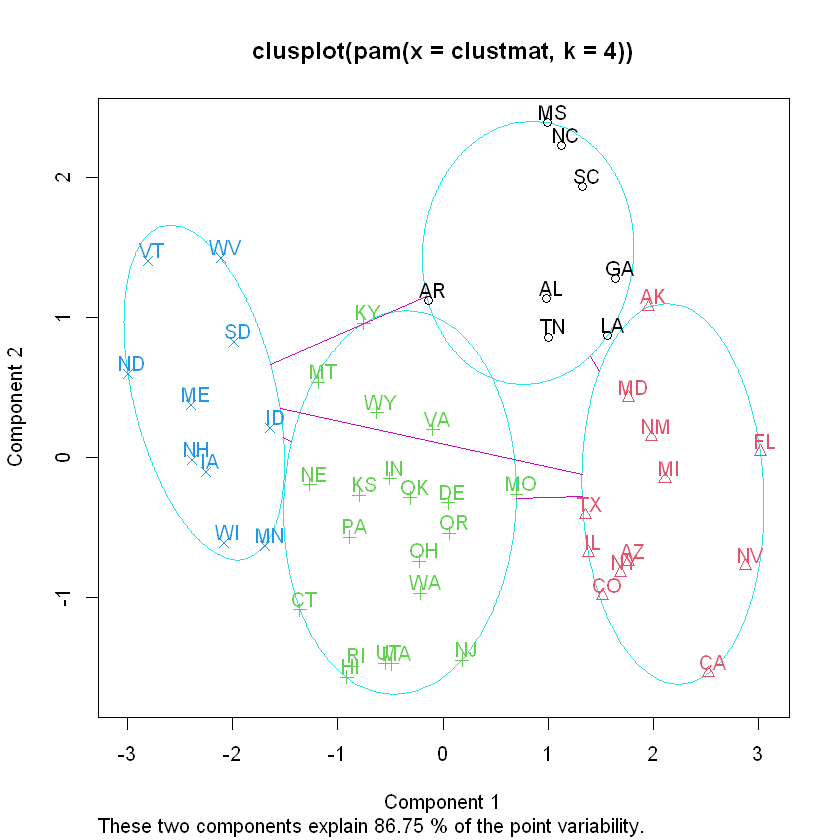

In [28]:
library(cluster)
clustmat <- scale(USArrests)
pam_out <- pam(clustmat, k = 4)
clusplot(pam_out, labels = 3, col.p = pam_out$clustering)

[1] 0.3389904

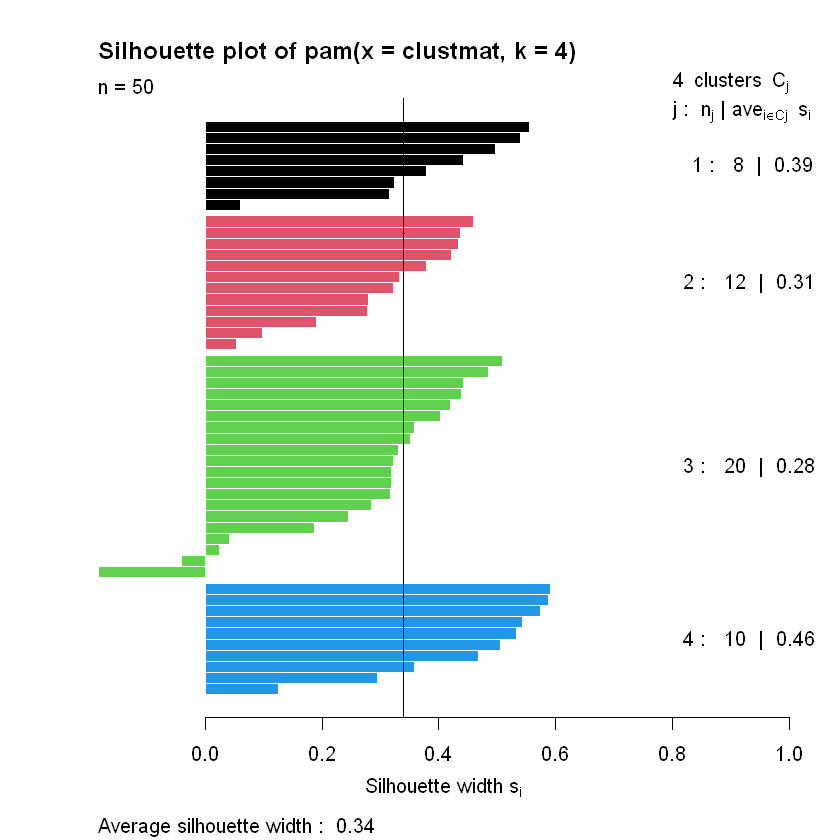

In [29]:
sp <- silhouette(pam_out)
plot(sp, col = 1:4)
mean(sp [, "sil_width"])
abline(v = mean(sp[, "sil_width"]))

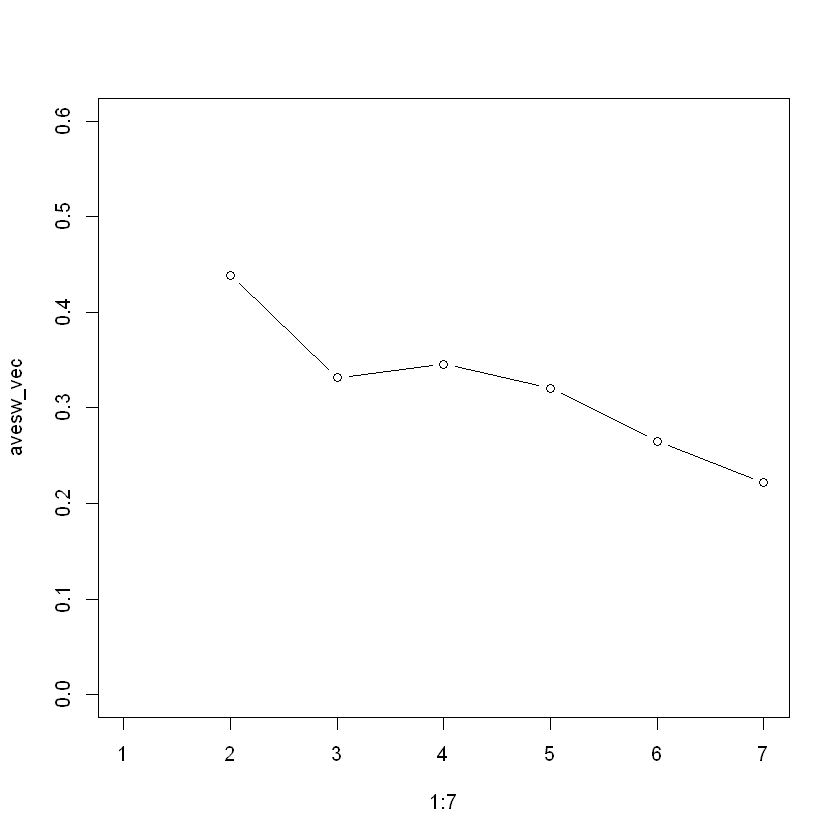

In [30]:
avesw_vec <- rep(NA, 7)
for(k in 2:7){
avesw_vec[k] <- mean(silhouette(pam(clustmat, k = k, metric = "manhattan"))[, "sil_width"])
}
plot(1:7, avesw_vec, type = "b", ylim = c(0,0.6))

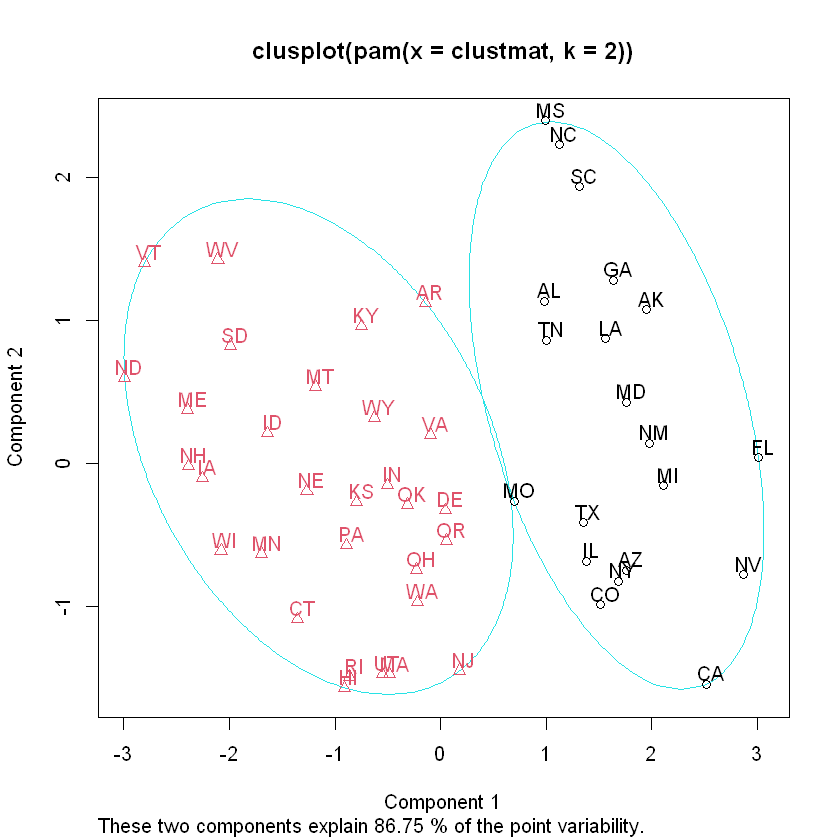

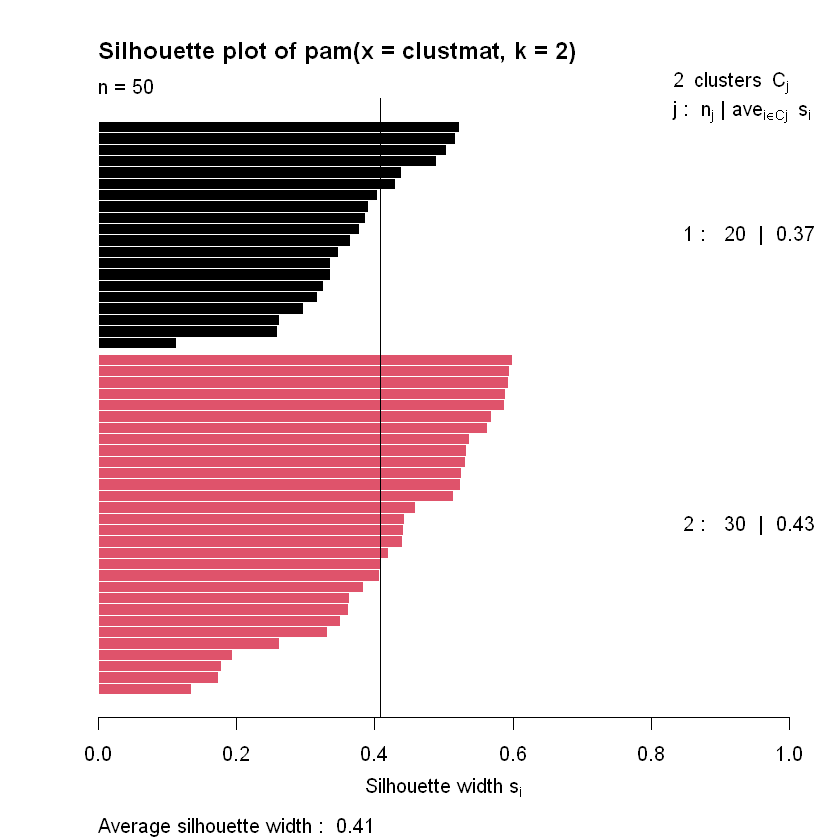

In [31]:
# completed code
pam_out <- pam(clustmat, k = 2)
clusplot(pam_out, labels = 3, col.p = pam_out$clustering)
sp <- silhouette(pam_out)
plot(sp, col = 1:2)
abline(v = mean(sp[, "sil_width"]))

In [32]:
km_out <- kmeans(clustmat, centers = 2, nstart=20)
table(km_out$cluster, pam_out$clustering)

   
     1  2
  1 20  0
  2  0 30